I am using data from the Centers for Diseasee Control and Prevention (CDC) on "Weekly Counts of Deaths by State and Select Causes, 2020-2021" (https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/muzy-jte6/data).

This dataset breaks all of 2020 up into weeks and compares the raw numbers for causes of death as the year progresses. The causes of death include natural cause, septicemia, malignant neoplasm, diabetes mellitus, alzheimers disease, influenza and pneumonia, chronic lower respiratory diseases, diseases of heart and COVID-19, as well as about half a dozen other diagosees. COVID-19 death counts are separated into "underlying cause" versus "multiple cause of death." These counts are listed for all of the U.S., as well as state by state.

Public health experts believe that the pandemic has caused and could continue to cause higher death rates due to other diseases because of the strain placed on the healthcare system and patients' reluctance to seek care for fear of contracting COVID-19. I would like to visually analyze this dataset to see if this effect may have occurred.  

(One complicating factor is that I don't know how much seasonal variation occurs with each disease. Influenza and pneumonia  obviously occur more in the winter, for example.)

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


covid_data = pd.read_csv("../Danielle/Desktop/COVID analysis__2020-2021.csv") # import csv
covid_data = covid_data.dropna() # remove rows with missing values/DATA INCONSISTENCY/DATA CLEANING: there were null values in some fields
#because the CDC supresses data for small populations. This is to adhere to HIPAA privacy laws. These suppressed fields
#occured mostly in areas with small populations overall, like Alaska, for example.
covid_data.shape # SANITY CHECK

(1111, 18)

In [284]:
covid_data.dtypes # SANITY CHECK

Jurisdiction of Occurrence                                                                            object
MMWR Week                                                                                              int64
Week Ending Date                                                                                      object
All Cause                                                                                              int64
Natural Cause                                                                                          int64
Septicemia (A40-A41)                                                                                 float64
Malignant neoplasms (C00-C97)                                                                        float64
Diabetes mellitus (E10-E14)                                                                          float64
Alzheimer disease (G30)                                                                              float64
Influenza and pneum

In [285]:
covid_data['All Other Diseases'] = covid_data.iloc[:,4:-2].sum(axis=1) # sum up all disease columns except covid
covid_data['All Covid Cases'] = covid_data.iloc[:,-3:-1].sum(axis=1) # sum all covid cases
#source for above code: https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

covid_data["Jurisdiction of Occurrence"].unique() # states in the data/SANITY CHECK


array(['United States', 'Alabama', 'Arizona', 'Arkansas', 'California',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana',
       'Kentucky', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Missouri', 'New Jersey', 'New York', 'New York City',
       'North Carolina', 'Ohio', 'Pennsylvania', 'South Carolina',
       'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wisconsin',
       'Puerto Rico'], dtype=object)

In [286]:
US_covid_data.columns # the columns of the dataframe/SANITY CHECK

Index(['Jurisdiction of Occurrence', 'MMWR Week', 'Week Ending Date',
       'All Cause', 'Natural Cause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'All Other Diseases',
       'All Covid Cases'],
      dtype='object')

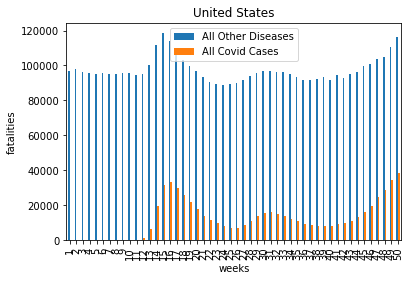

In [287]:
US_covid_data = covid_data[:50] # top 50 rows describe the U.S. overall
graph = US_covid_data.plot(x="MMWR Week",y=["All Other Diseases","All Covid Cases"], kind="bar", title= "United States", ylabel = "fatalities", xlabel = "weeks")

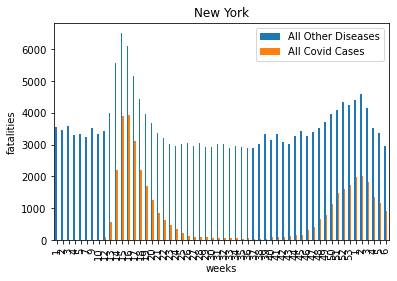

In [288]:
NY_covid_data = covid_data[covid_data['Jurisdiction of Occurrence'].isin(['New York'])] # only New York data
#source for above code: https://tinyurl.com/a7mxx5hj
graph = NY_covid_data.plot(x="MMWR Week",y=["All Other Diseases","All Covid Cases"], kind="bar", title= "New York", ylabel = "fatalities", xlabel = "weeks")

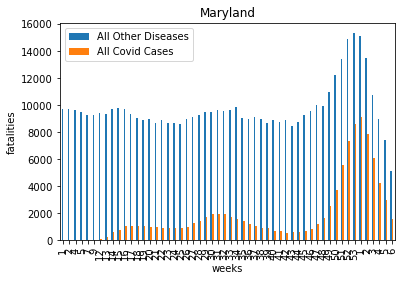

In [289]:
MD_covid_data = covid_data[covid_data['Jurisdiction of Occurrence'].isin(['Maryland'])] # only Maryland data
#source for above code: https://tinyurl.com/a7mxx5hj
graph = CA_covid_data.plot(x="MMWR Week",y=["All Other Diseases","All Covid Cases"], kind="bar", title= "Maryland", ylabel = "fatalities", xlabel = "weeks")

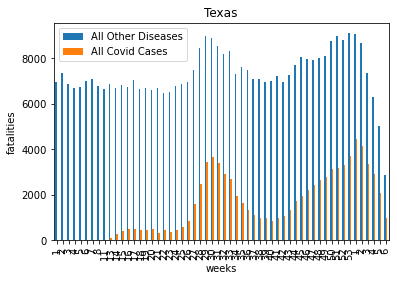

In [290]:
TX_covid_data = covid_data[covid_data['Jurisdiction of Occurrence'].isin(['Texas'])] # only Texas data
graph = TX_covid_data.plot(x="MMWR Week",y=["All Other Diseases","All Covid Cases"], kind="bar", title= "Texas", ylabel = "fatalities", xlabel = "weeks")
#CA_covid_data

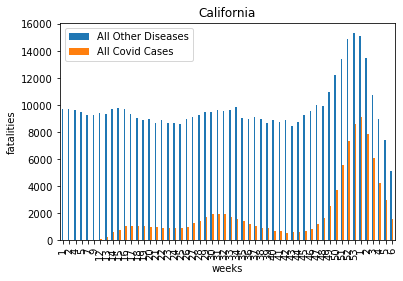

In [291]:
CA_covid_data = covid_data[covid_data['Jurisdiction of Occurrence'].isin(['California'])] # only California data
graph = CA_covid_data.plot(x="MMWR Week",y=["All Other Diseases","All Covid Cases"], kind="bar", title= "California", ylabel = "fatalities", xlabel = "weeks")

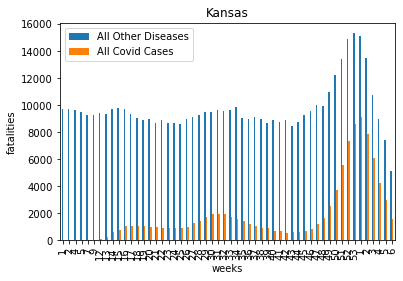

In [292]:
KA_covid_data = covid_data[covid_data['Jurisdiction of Occurrence'].isin(['Kansas'])] # only Kansas data
graph = CA_covid_data.plot(x="MMWR Week",y=["All Other Diseases","All Covid Cases"], kind="bar", title= "Kansas", ylabel = "fatalities", xlabel = "weeks")

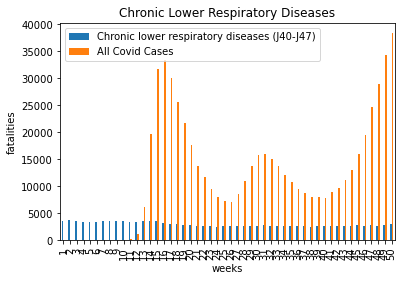

In [293]:
graph = US_covid_data.plot(x="MMWR Week",y=["Chronic lower respiratory diseases (J40-J47)","All Covid Cases"], kind="bar", title = "Chronic Lower Respiratory Diseases", ylabel = "fatalities", xlabel = "weeks")

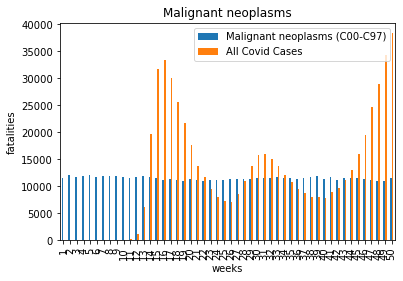

In [294]:
graph = US_covid_data.plot(x="MMWR Week",y=["Malignant neoplasms (C00-C97)","All Covid Cases"], kind="bar", title = "Malignant neoplasms", ylabel = "fatalities", xlabel = "weeks")

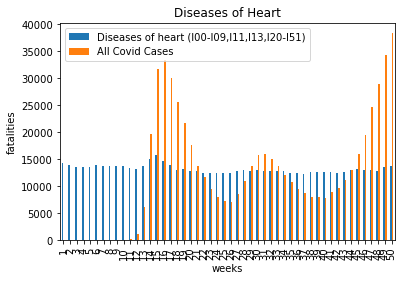

In [295]:
graph = US_covid_data.plot(x="MMWR Week",y=["Diseases of heart (I00-I09,I11,I13,I20-I51)","All Covid Cases"], kind="bar", title ="Diseases of Heart", ylabel = "fatalities", xlabel = "weeks")

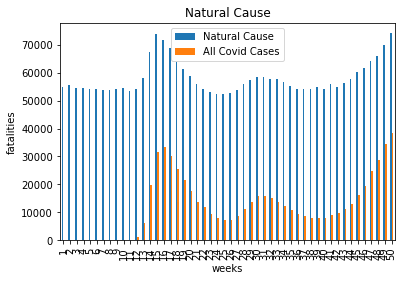

In [296]:
graph = US_covid_data.plot(x="MMWR Week", y=["Natural Cause","All Covid Cases"], kind="bar", title ="Natural Cause", ylabel = "fatalities", xlabel = "weeks")

As you can see, the hypothesis I made can be visualized within some of the above graphs. Deaths due to non-COVID disease rose in concert with deaths due to COVID. While this is difficult to observe when looking at individual diseases with low fatality rates, it is quite striking and obvious when comparing natural causes of death to COVID deaths. It is important to note that "natural cause" is an ambiguous catch-all with no scientific meaning. Each of these patients, regardless of age, died to failure of one or multiple organ systems. This brings up an important point. Health data scientists must pay close atttention to ambiquous terms like these. This is where data likes to hide. 
I'll also note the temporal variance of when deaths spiked in different states. We all observed this as it was happening. COVID hit New York, California and Washington first, then it spread to landlocked and then to landdlocked rural areas.
In summary, my hypothesis appears to be correct. Patients in need of care did not attain it, most likely due to overwhelming of hospital networks, and perhaps partially because of patient avoidance of care centers for fear of catching COVID. Thus, this pandemic has sadly killed more than just COVID patients. 